In [1]:
 !pip install yfinance
!pip install mplfinance

In [2]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import mplfinance as mpf
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
import yfinance as yahooFinance
 
 
gold_price = yahooFinance.Ticker("GC=F")

In [4]:
Data = gold_price.history(period="2y")

In [5]:
Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-23,1505.300049,1567.000000,1490.199951,1567.000000,51,0,0
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951,442,0,0
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049,476,0,0
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3,0,0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638,0,0
...,...,...,...,...,...,...,...
2022-03-16,1922.400024,1922.400024,1907.199951,1908.000000,104,0,0
2022-03-17,1933.900024,1947.199951,1933.900024,1942.099976,39,0,0
2022-03-18,1934.500000,1939.300049,1928.199951,1928.199951,28,0,0


In [6]:
Data.isnull().sum().sum()

0

In [7]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,506.0,1816.696444,80.973395,1505.300049,1767.425018,1805.800049,1872.875031,2053.600098
High,506.0,1826.911266,80.825802,1567.000000,1777.149994,1813.599976,1880.950043,2072.000000
Low,506.0,1806.850197,80.172062,1490.199951,1759.274963,1799.400024,1866.274994,2040.000000
Close,506.0,1817.203357,80.159246,1567.000000,1766.449951,1807.399963,1874.399963,2051.500000
Volume,506.0,4602.235178,25184.157258,0.000000,96.250000,275.500000,729.750000,209835.000000
Dividends,506.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stock Splits,506.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


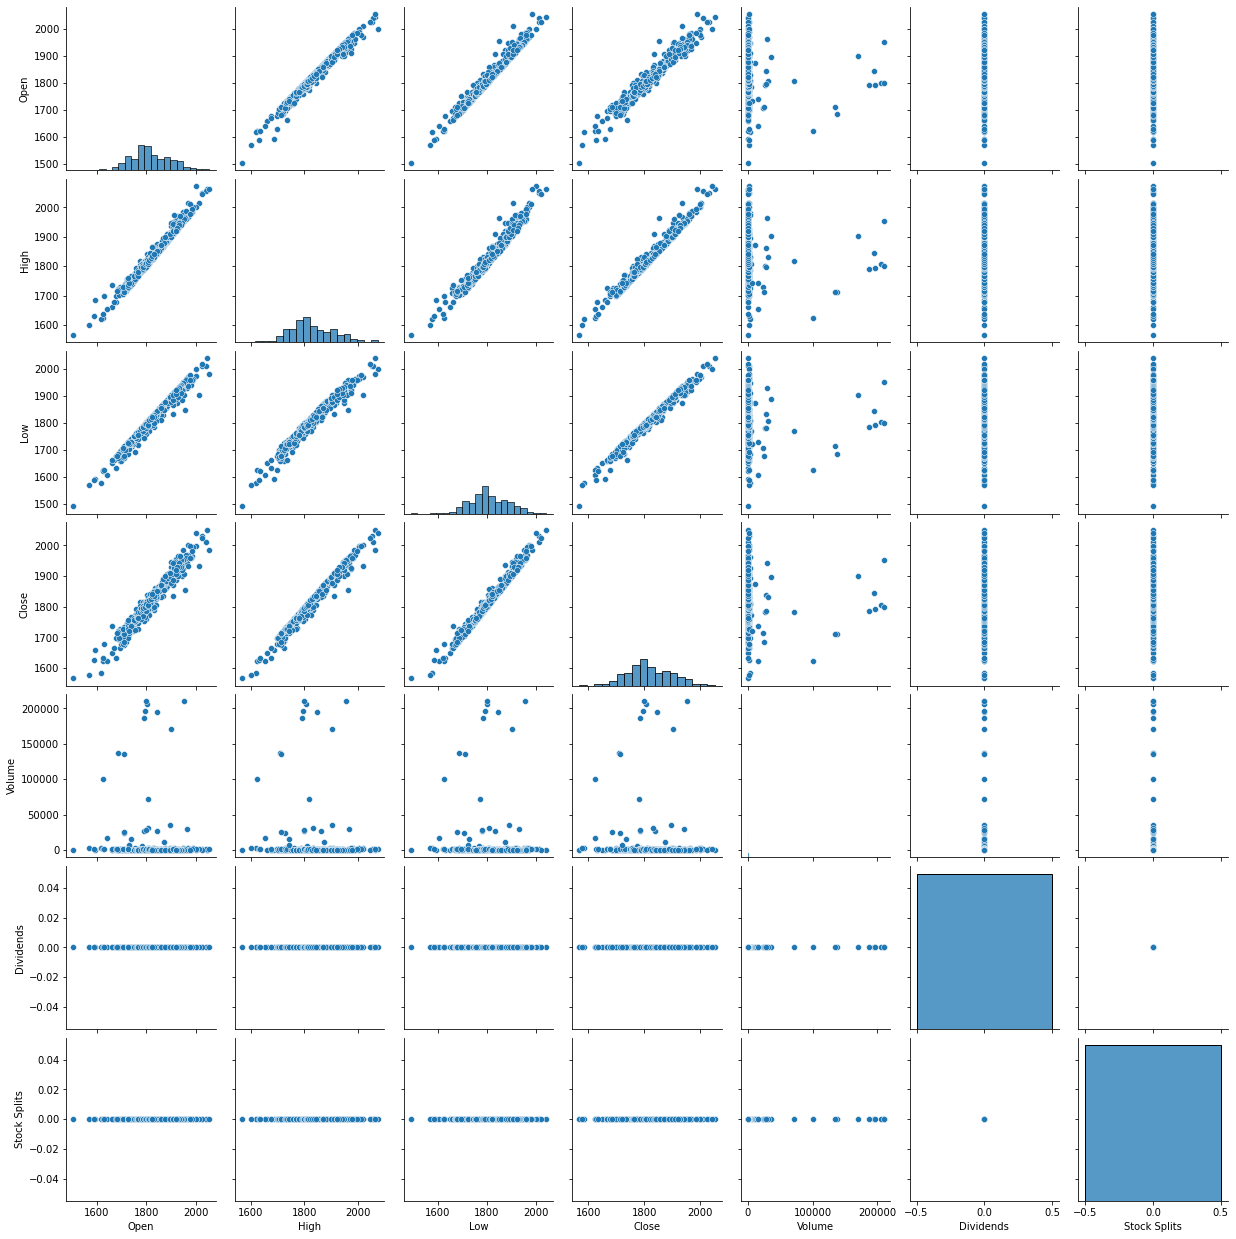

In [8]:
sns.pairplot(Data)
None

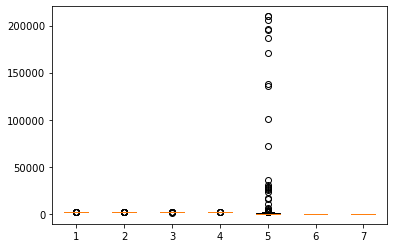

In [9]:
plt.boxplot(Data)
None

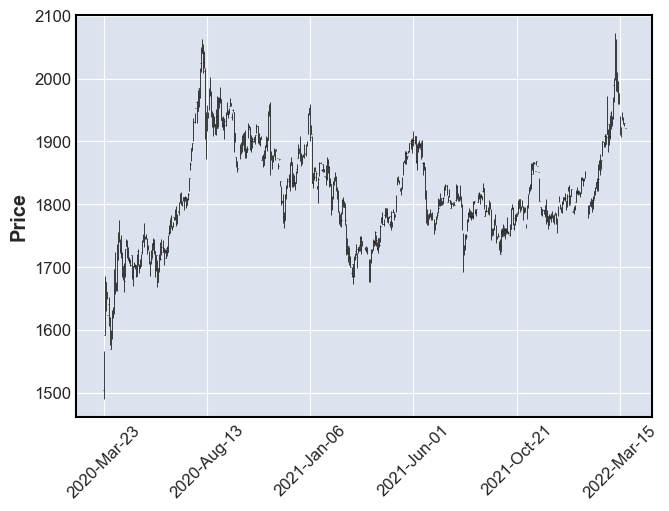

In [10]:
mpf.plot(Data)

<AxesSubplot:>

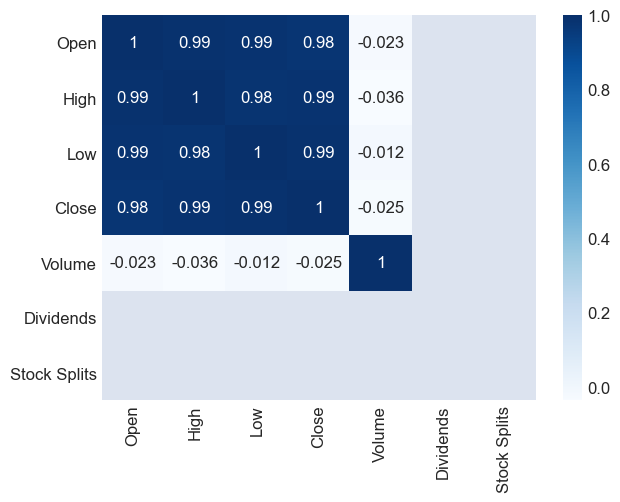

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(Data.corr(),cmap='Blues',annot=True)

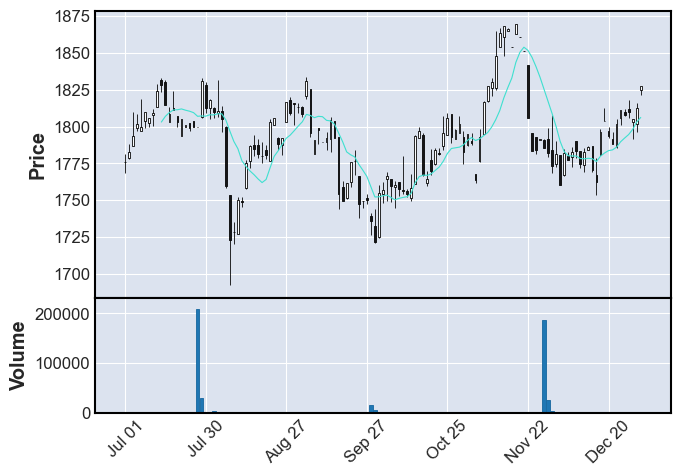

In [12]:
mpf.plot(Data["2021-7":"2021-12"],type="candle",mav=(10),volume=True)   # 10 Days moving avarage

In [13]:
Data.drop(columns=['Volume'],inplace=True,axis=0)

# Upsampling

In [14]:
data = Data.resample('D').mean()
data.head(7)

,Open,High,Low,Close,Dividends,Stock Splits
Date,,,,,,
2020-03-23,1505.300049,1567.000000,1490.199951,1567.000000,0.0,0.0
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951,0.0,0.0
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049,0.0,0.0
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,0.0,0.0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,0.0,0.0
2020-03-28,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
price= data.interpolate(method = 'linear')
price.head(7)

,Open,High,Low,Close,Dividends,Stock Splits
Date,,,,,,
2020-03-23,1505.300049,1567.000000,1490.199951,1567.000000,0.0,0.0
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951,0.0,0.0
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049,0.0,0.0
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,0.0,0.0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,0.0,0.0
2020-03-28,1629.666667,1633.533366,1618.333333,1623.266683,0.0,0.0
2020-03-29,1635.433309,1643.166707,1612.766642,1622.633341,0.0,0.0


 Price = pd.DataFrame(Data)
Price.to_csv("Forecast data.csv")

In [16]:
price

,Open,High,Low,Close,Dividends,Stock Splits
Date,,,,,,
2020-03-23,1505.300049,1567.000000,1490.199951,1567.000000,0.0,0.0
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951,0.0,0.0
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049,0.0,0.0
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,0.0,0.0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,0.0,0.0
...,...,...,...,...,...,...
2022-03-18,1934.500000,1939.300049,1928.199951,1928.199951,0.0,0.0
2022-03-19,1931.466675,1935.733358,1927.133301,1928.333293,0.0,0.0
2022-03-20,1928.433350,1932.166667,1926.066650,1928.466634,0.0,0.0


In [17]:
x = price.drop(['Close'],axis =1)
y = price['Close']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=42)

In [19]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [20]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'bootstrap': True}


In [21]:
model = RandomForestRegressor(n_estimators=1000, random_state=1, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[1793.24062994 1997.02885502 1827.49876124 1715.71849806 1781.84052397
 1832.42061066 1697.64770261 1736.1651951  1976.14827775 1729.66698317
 1726.8143056  1931.20533422 1715.22885265 1899.5015938  1894.17469096
 1725.00611331 1770.03735485 1724.16712113 1788.1478713  1813.68015269
 1745.28147521 1895.16278722 1816.37832564 1808.52341948 1890.41376468
 1866.90113803 1829.95251562 1692.00522583 1890.75722542 1739.51896709
 1708.91630349 1841.1784897  1752.88080772 1704.67487564 1863.21844921
 1898.07077705 1722.28129816 1777.47990787 1608.96942973 1800.34346851
 1722.06751214 2013.93694523 1951.07632052 1819.59361255 1897.04652017
 1871.69081267 1785.85787287 1905.33745875 1887.19309058 1814.89849877
 1903.03895725 1804.14194073 1795.29162278 1833.52824965 1889.43730253
 1815.60157075 1908.22997034 1790.27372842 1906.65986379 1900.68963412
 1973.80446895 1905.45228798 1923.00177884 1931.09356333 1782.80738811
 1686.35015999 1717.28252069 1778.83950263 1702.0994467  1703.51153275
 1831.

In [22]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 5.6996
Mean Squared Error: 71.5937
Root Mean Squared Error: 8.4613
(R^2) Score: 0.9893
Train Score : 99.84% and Test Score : 98.93% using Random Tree Regressor.
Accuracy: 99.69 %.


In [23]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=data.index[-1], periods=len(predict), freq="D"))
#predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values

onemonth_df = pd.DataFrame(predictions[:30])
onemonth_df.to_csv("one-month-predictions.csv")


In [24]:
onemonth_df_pred = pd.read_csv('one-month-predictions.csv')
onemonth_df_pred

,Unnamed: 0,Predictions
0,2022-03-22,1793.240630
1,2022-03-23,1997.028855
2,2022-03-24,1827.498761
3,2022-03-25,1715.718498
4,2022-03-26,1781.840524
5,2022-03-27,1832.420611
6,2022-03-28,1697.647703
7,2022-03-29,1736.165195
8,2022-03-30,1976.148278
9,2022-03-31,1729.666983


Buy price and date
    Unnamed: 0  Predictions
27  2022-04-18  1692.005226
Sell price and date
   Unnamed: 0  Predictions
1  2022-03-23  1997.028855


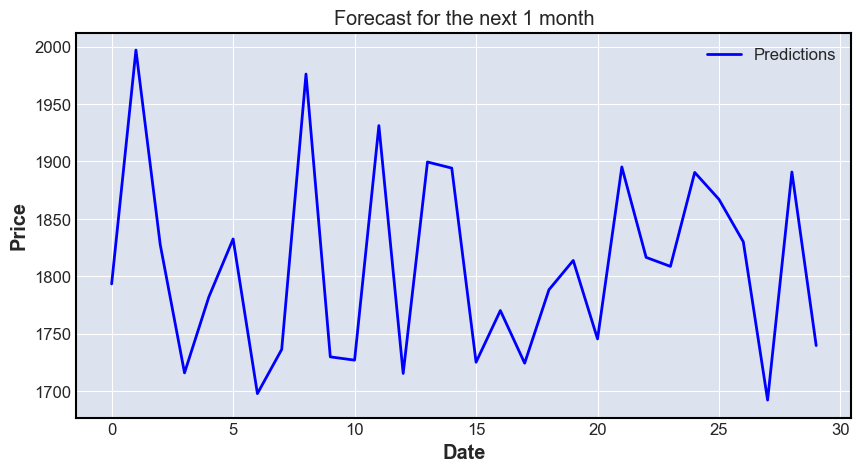

In [25]:
#onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
#onemonth_df_pred.set_index("Date", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
x_train

array([[ 1.14450309,  1.01721079,  0.33517698,  0.        ,  0.        ],
       [ 0.15703699,  0.04678717,  0.0843276 ,  0.        ,  0.        ],
       [-1.13338644, -1.18292353, -1.24671107,  0.        ,  0.        ],
       ...,
       [ 0.81999603,  0.78283948,  0.95206339,  0.        ,  0.        ],
       [ 1.10774218,  1.12109367,  1.08644715,  0.        ,  0.        ],
       [-0.51479429, -0.53439073, -0.43944975,  0.        ,  0.        ]])

In [28]:
model = ARIMA(price.Close, order=(5,1,0))
model_fit = model.fit(disp=0);

In [33]:
model_fit.forecast(30)

(array([1922.11053635, 1922.2747835 , 1922.85761773, 1923.37144627,
        1924.18982851, 1924.62074418, 1925.12760071, 1925.59957675,
        1926.07893948, 1926.54590783, 1927.02911919, 1927.50826283,
        1927.98958342, 1928.47034964, 1928.95166019, 1929.43228085,
        1929.91310683, 1930.39381191, 1930.87455253, 1931.35526764,
        1931.83601255, 1932.31674741, 1932.79748857, 1933.27822766,
        1933.75896799, 1934.23970701, 1934.72044652, 1935.20118571,
        1935.68192501, 1936.16266425]),
 array([15.2977249 , 21.1768622 , 26.072133  , 30.12303984, 33.67106558,
        36.63094331, 39.38701289, 41.94665362, 44.36266079, 46.654424  ,
        48.84625569, 50.94306676, 52.95768391, 54.89820253, 56.77241571,
        58.58644382, 60.34600151, 62.05565249, 63.71945989, 65.3409145 ,
        66.92310457, 68.46874125, 69.98024975, 71.4597936 , 72.90931939,
        74.33058288, 75.72517587, 77.09454558, 78.44001313, 79.76278807]),
 array([[1892.1275465 , 1952.09352621],
    